<a href="https://colab.research.google.com/github/bcwein/1RT705APML-Project/blob/main/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Question 5 A first Gibbs sampler

Want to estimate posterior

$$
p(s_1, s_2|y=1)
$$

And we know that $p(y=1)$ = $p(t>0)$.

so

$$
p(s_1, s_2|t>0)
$$

# Project in APML

Contributors:

- Bjørn Christian Weinbach
- Emil
- Markus

In [148]:
import numpy as np
import scipy.stats
import matplotlib.pyplot
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

def gibbsSampler(L, mu_s, sigma_s, burn=0):
    L = L

    # Initial Chain of values
    s1 = np.zeros(L)
    s2 = np.zeros(L)
    t = np.zeros(L)
    y = 1
    s1[0] = 10
    s2[0] = 10
    t[0] = 1

    # Hyperparameters
    sigma_s = sigma_s
    mu_s = mu_s
    sigma_ts = 1

    def corr1(sigmaa, A, sigmaba, mua, xb): 
        sigmaab = np.linalg.pinv(np.linalg.pinv(sigmaa) + np.outer(A.T, A)*sigmaba**-1)
        muab = sigmaab@(np.linalg.pinv(sigmaa)@mua + A.T*sigmaba**-1*xb)
        return sigmaab, muab

    for l in range(L-1):
        # Sample S
        A = np.array([s1[l], -s2[l]])
        sigma_st, mu_st = corr1(sigma_s, A, sigma_ts, mu_s, t[l])
        s1[l+1], s2[l+1] = scipy.stats.multivariate_normal.rvs(mean=mu_st, cov=sigma_st)

        # Sample T
        smean = s1[l] - s2[l]
        a_scaled, b_scaled = (0 - (smean)) / sigma_ts, (np.inf - (smean)) / sigma_ts
        t[l+1] = scipy.stats.truncnorm.rvs(a_scaled, b_scaled, loc=smean, scale=np.sqrt(sigma_ts))
    return s1[burn:], s2[burn:], t[burn:]

In [149]:
# Samples
L = 10**4
burn = 50
# Priors
sigma_s = np.array([[1, 0], [0, 1]])
mu_s = np.array([1, 1])

# Sample
s1, s2, t = gibbsSampler(L+burn, mu_s, sigma_s, burn)

In [150]:
experiment = pd.DataFrame(
    {
        "s1": s1,
        "s2": s2,
        "t": t
    }
)

0.9925964380485987

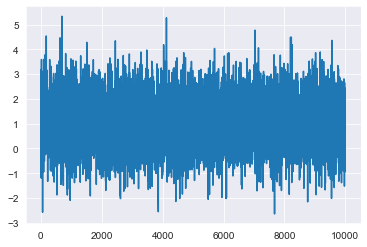

In [151]:
plt.plot(s1)
plt.savefig("s1traceplotwithoutburnin.png")
np.mean(s1)

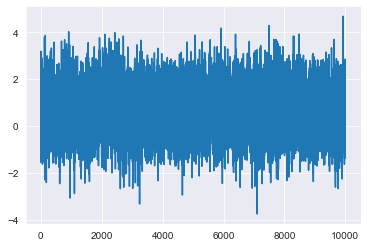

In [152]:
plt.plot(s2)
plt.savefig("s2traceplotwithoutburnin.png")

<Figure size 1080x1080 with 0 Axes>

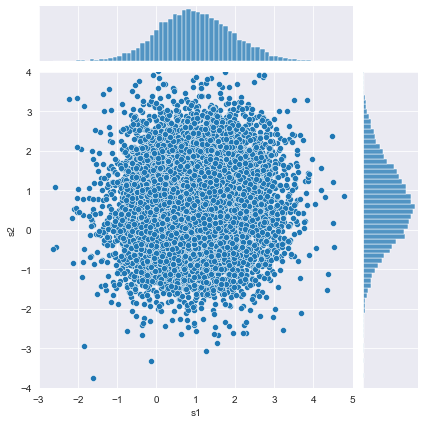

In [153]:
plt.figure(figsize=(15, 15))
sns.set_style("darkgrid")
sns.jointplot(data=experiment, x="s1", y="s2",
              xlim=(-3, 5), ylim=(-4, 4))
plt.savefig("s1s2jointplot.png")

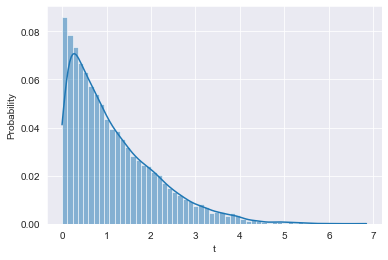

In [154]:
sns.histplot(experiment, x="t", kde=True, fill=True, stat='probability')
plt.savefig("thistogram.png")

### Trueskill representation of the skills

We will transform the samples into a gaussian. We will do this by approximating it as a gaussian.

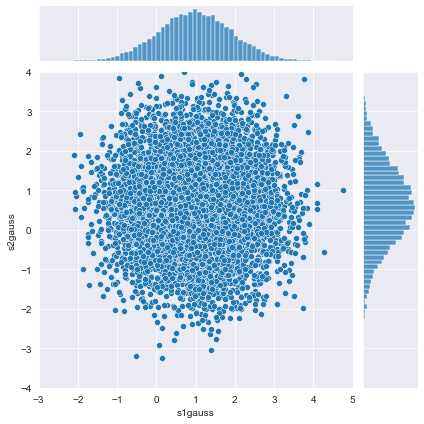

In [155]:
def gaussianApprox(samples):
    return scipy.stats.norm(loc=np.mean(samples), scale=np.std(samples))

s1gauss = gaussianApprox(experiment.s1)
s2gauss = gaussianApprox(experiment.s2)

approximation = pd.DataFrame(
    {
        "s1gauss" : s1gauss.rvs(L),
        "s2gauss" : s2gauss.rvs(L),
    }
)

sns.jointplot(data=approximation, x="s1gauss", y="s2gauss",
              xlim=(-3, 5), ylim=(-4, 4))
plt.savefig("GaussApproxJointPlot.png")

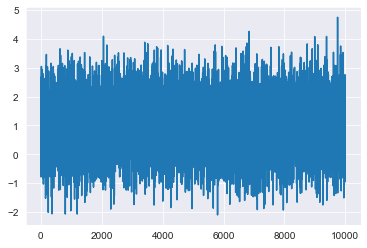

In [156]:
plt.plot(approximation.s1gauss)
plt.savefig("s1GaussApproxTraceplot.png")

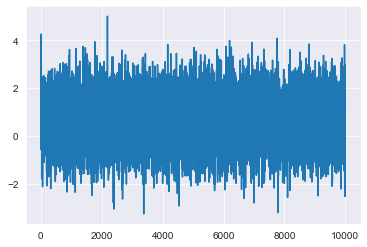

In [157]:
plt.plot(approximation.s2gauss)
plt.savefig("s1GaussApproxTraceplot.png")

### Plot histogram of samples with fitted gaussians $L=10^4$

In [158]:
# Samples
L = 10**4
burn = 50
# Priors
sigma_s = np.array([[1, 0], [0, 1]])
mu_s = np.array([1, 1])

# Sample
s1, s2, t = gibbsSampler(L+burn, mu_s, sigma_s, burn)

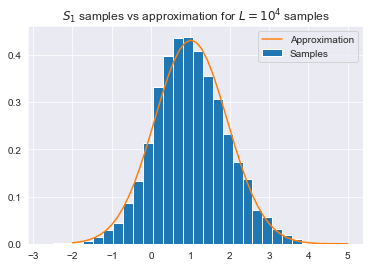

In [159]:
s1gauss = gaussianApprox(s1)
x = np.linspace(-2, 5)
plt.hist(s1, bins=30, density=True, label='Samples')
plt.plot(x, s1gauss.pdf(x), label='Approximation')
plt.legend()
plt.title("$S_1$ samples vs approximation for $L =10^4$ samples")
plt.savefig("s1samplevsdist10000.png")

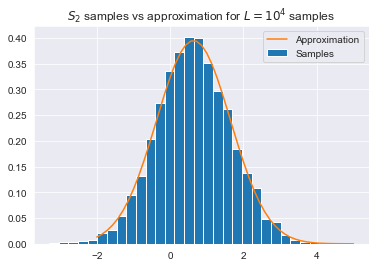

In [160]:
s2gauss = gaussianApprox(s2)
x = np.linspace(-2, 5)
plt.hist(s2, bins=30, density=True, label='Samples')
plt.plot(x, s2gauss.pdf(x), label='Approximation')
plt.legend()
plt.title("$S_2$ samples vs approximation for $L =10^4$ samples")
plt.savefig("s2samplevsdist10000.png")

### Plot histogram of samples with fitted gaussians $L=10^3$

In [161]:
# Samples
L = 10**3
burn = 50
# Priors
sigma_s = np.array([[1, 0], [0, 1]])
mu_s = np.array([1, 1])

# Sample
s1, s2, t = gibbsSampler(L+burn, mu_s, sigma_s, burn)

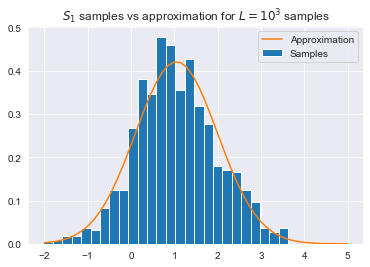

In [162]:
s1gauss = gaussianApprox(s1)
x = np.linspace(-2, 5)
plt.hist(s1, bins=30, density=True, label='Samples')
plt.plot(x, s1gauss.pdf(x), label='Approximation')
plt.legend()
plt.title("$S_1$ samples vs approximation for $L =10^3$ samples")
plt.savefig("s1samplevsdist1000.png")

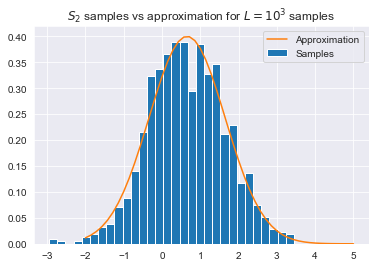

In [163]:
s2gauss = gaussianApprox(s2)
x = np.linspace(-2, 5)
plt.hist(s2, bins=30, density=True, label='Samples')
plt.plot(x, s2gauss.pdf(x), label='Approximation')
plt.legend()
plt.title("$S_2$ samples vs approximation for $L =10^3$ samples")
plt.savefig("s2samplevsdist1000.png")

### Plot histogram of samples with fitted gaussians $L=100$

In [164]:
# Samples
L = 100
burn = 50
# Priors
sigma_s = np.array([[1, 0], [0, 1]])
mu_s = np.array([1, 1])

# Sample
s1, s2, t = gibbsSampler(L+burn, mu_s, sigma_s, burn)

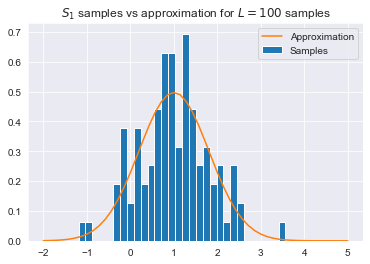

In [165]:
s1gauss = gaussianApprox(s1)
x = np.linspace(-2, 5)
plt.hist(s1, bins=30, density=True, label='Samples')
plt.plot(x, s1gauss.pdf(x), label='Approximation')
plt.legend()
plt.title("$S_1$ samples vs approximation for $L =100$ samples")
plt.savefig("s1samplevsdist100.png")

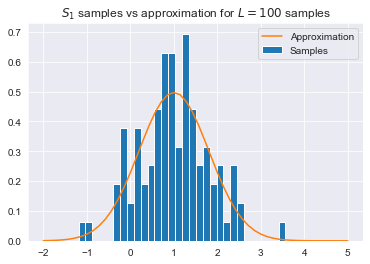

In [166]:
s2gauss = gaussianApprox(s2)
x = np.linspace(-2, 5)
plt.hist(s1, bins=30, density=True, label='Samples')
plt.plot(x, s1gauss.pdf(x), label='Approximation')
plt.legend()
plt.title("$S_1$ samples vs approximation for $L =100$ samples")
plt.savefig("s2samplevsdist100.png")

### Plot histogram of samples with fitted gaussians $L=30$

In [167]:
# Samples
L = 30
burn = 50
# Priors
sigma_s = np.array([[1, 0], [0, 1]])
mu_s = np.array([1, 1])

# Sample
s1, s2, t = gibbsSampler(L+burn, mu_s, sigma_s, burn)

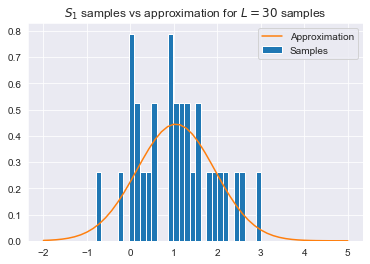

In [168]:
s1gauss = gaussianApprox(s1)
x = np.linspace(-2, 5)
plt.hist(s1, bins=30, density=True, label='Samples')
plt.plot(x, s1gauss.pdf(x), label='Approximation')
plt.legend()
plt.title("$S_1$ samples vs approximation for $L =30$ samples")
plt.savefig("s1samplevsdist30.png")

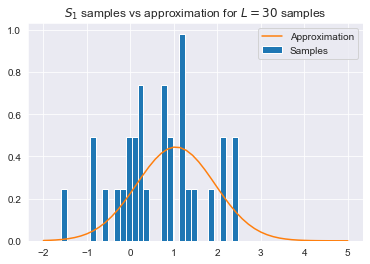

In [169]:
s2gauss = gaussianApprox(s2)
x = np.linspace(-2, 5)
plt.hist(s2, bins=30, density=True, label='Samples')
plt.plot(x, s1gauss.pdf(x), label='Approximation')
plt.legend()
plt.title("$S_1$ samples vs approximation for $L =30$ samples")
plt.savefig("s2samplevsdist30.png")

### Compare priors with posteriors given thet $p(s|y=1)$

Our prior stated:

$$
p(s_1) = \sim N(s_1; 1, 1)
$$

$$
p(s_2) = \sim N(s_2; 1, 1)
$$

Empirically we have:

In [170]:
np.mean(s1)

1.0450759182966023

In [171]:
np.var(s1)

0.8046794646796406

In [172]:
np.mean(s2)

0.6559132286194204

In [173]:
np.var(s2)

0.9930301736234699

# Question 6

Use ADF with Gibbs sampling to process the matches in theSerieAdataset and estimatethe skill of all the teams in the dataset 

In [209]:
# Read the data
data = 'datasets/SerieA.csv'
shuffle = True
serieA = pd.read_csv(data)
cleaned = serieA[serieA['score1'] != serieA['score2']]
cleaned["pred"] = 0
cleaned['true'] = np.where(cleaned['score1'] > cleaned['score2'], 1, -1)
if(shuffle):
    cleaned = cleaned.sample(frac=1).reset_index(drop=True)
cleaned

<ipython-input-209-5396bc7565c3>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned["pred"] = 0
<ipython-input-209-5396bc7565c3>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned['true'] = np.where(cleaned['score1'] > cleaned['score2'], 1, -1)


,yyyy-mm-dd,HH:MM,team1,team2,score1,score2,pred,true
0,2018-12-16,20:30,Roma,Genoa,3,2,0,1
1,2019-04-29,21:00,Fiorentina,Sassuolo,0,1,0,-1
2,2019-02-24,15:00,Bologna,Juventus,0,1,0,-1
3,2019-02-15,20:30,Juventus,Frosinone,3,0,0,1
4,2018-09-02,18:00,Fiorentina,Udinese,1,0,0,1
...,...,...,...,...,...,...,...,...
267,2018-08-20,20:30,Atalanta,Frosinone,4,0,0,1
268,2018-12-29,18:00,Napoli,Bologna,3,2,0,1
269,2019-02-10,15:00,Atalanta,Spal,2,1,0,1
270,2019-02-17,12:30,Spal,Fiorentina,1,4,0,-1


## Add priors to all teams

In [210]:
# hyperparameters
L = 100
burn = 50
# Priors
sigma_s = np.array([[1, 0], [0, 1]], dtype=np.float64)
mu_s = np.array([1, 1], dtype=np.float64)

# Sample
s1, s2, t = gibbsSampler(L+burn, mu_s, sigma_s, burn)
s1gauss = gaussianApprox(s1)
s2gauss = gaussianApprox(s2)
teams = cleaned.team1.unique()

# Make dictionary of priors
distributions = {}

# Give all same prior
for team in teams:
    distributions[team] = s1gauss

## Update distributions based on data

In [211]:
# Update priors based on data
for index, row in cleaned.iterrows():
    if row['score1'] > row['score2']:
        # Team 1 won
        mu1 = distributions[row['team1']].mean()
        mu2 = distributions[row['team2']].mean()
        s1 = distributions[row['team1']].var()
        s2 = distributions[row['team2']].var()

        mu_s = np.array([mu1, mu2], np.float64)
        sigma_s = np.array([[s1, 0], [0, s2]], dtype=np.float64)

        # Sample
        s1, s2, t = gibbsSampler(L+burn, mu_s, sigma_s, burn)
        s1gauss = gaussianApprox(s1)
        s2gauss = gaussianApprox(s2)
        distributions[row['team1']] = s1gauss
        distributions[row['team2']] = s2gauss

    else:
        # Team 2 won
        mu1 = distributions[row['team2']].mean()
        mu2 = distributions[row['team1']].mean()
        s1 = distributions[row['team2']].var()
        s2 = distributions[row['team1']].var()

        mu_s = np.array([mu1, mu2], np.float64)
        sigma_s = np.array([[s1, 0], [0, s2]], dtype=np.float64)

        # Sample
        s1, s2, t = gibbsSampler(L+burn, mu_s, sigma_s, burn)
        s1gauss = gaussianApprox(s1)
        s2gauss = gaussianApprox(s2)
        distributions[row['team2']] = s1gauss
        distributions[row['team1']] = s2gauss


## Create a ranking table that ranks based on trueskill's conservative skill with $k=3$

In [213]:
team, cs = [], []
k = 3

for key, dist in distributions.items():
    team.append(key)
    cs.append(dist.mean() - k*dist.std())

results = pd.DataFrame(
    {
        'Team': team,
        'Conservative Skill': cs
    }
)
results = results.sort_values('Conservative Skill', ascending=False).reset_index(drop=True)
results

,Team,Conservative Skill
0,Atalanta,0.147009
1,Inter,0.140300
2,Milan,0.101151
3,Juventus,0.036500
4,Napoli,-0.006417
5,Spal,-0.013766
6,Roma,-0.250263
7,Cagliari,-0.267026
8,Parma,-0.405728
9,Lazio,-0.598022


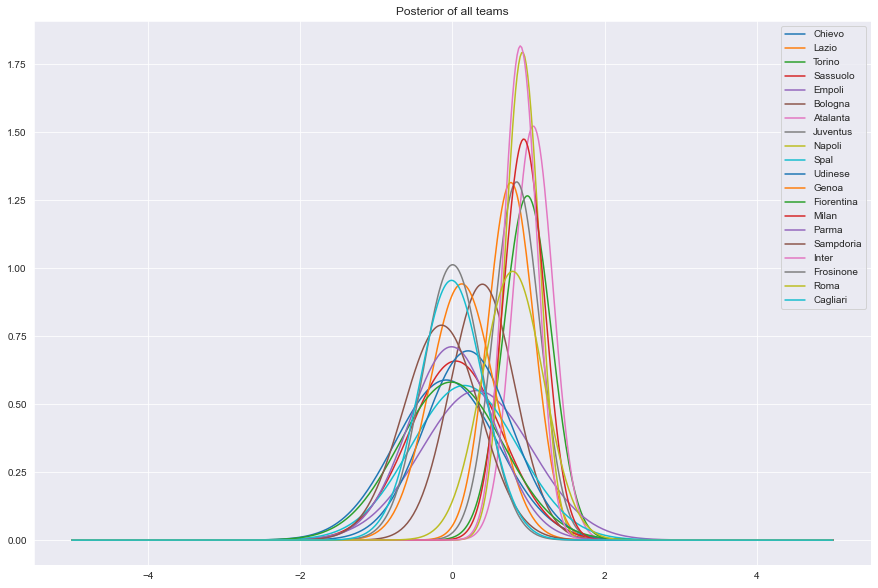

In [191]:
x = np.linspace(-5, 5, 500)

plt.figure(figsize=(15, 10))

for key, dist in distributions.items():
    plt.plot(x, dist.pdf(x), label=key)

plt.legend()
plt.title("Posterior of all teams")
plt.savefig("posteriors.png")

## Q7 Using the model for predictions



In [179]:
def winningPrediction(player1, player2, k=3):
    m1, m2 = distributions[player1].mean(), distributions[player2].mean()
    s1, s2 = distributions[player1].std(), distributions[player2].std()
    cs1, cs2 = m1 - k*s1, m2 - k*s2
    if(cs1 >= cs2):
      return 1
    else:
      return -1

## Reset Priors

In [180]:
# hyperparameters
L = 100
burn = 50

# Priors
sigma_s = np.array([[1, 0], [0, 1]], dtype=np.float64)
mu_s = np.array([1, 1], dtype=np.float64)

# Sample
s1, s2, t = gibbsSampler(L+burn, mu_s, sigma_s, burn)
s1gauss = gaussianApprox(s1)
s2gauss = gaussianApprox(s2)
teams = cleaned.team1.unique()

# Make dictionary of priors
distributions = {}

# Give all same prior
for team in teams:
    distributions[team] = s1gauss

## Calculate posterior and predict one step ahead

In [181]:
pred = []

# Update priors based on data
for index, row in cleaned.iterrows():
    if row['score1'] > row['score2']:
        # Team 1 won
        mu1 = distributions[row['team1']].mean()
        mu2 = distributions[row['team2']].mean()
        s1 = distributions[row['team1']].var()
        s2 = distributions[row['team2']].var()

        pred.append(winningPrediction(row['team1'], row['team2']))

        mu_s = np.array([mu1, mu2], np.float64)
        sigma_s = np.array([[s1, 0], [0, s2]], dtype=np.float64)

        # Sample
        s1, s2, t = gibbsSampler(L+burn, mu_s, sigma_s, burn)
        s1gauss = gaussianApprox(s1)
        s2gauss = gaussianApprox(s2)
        distributions[row['team1']] = s1gauss
        distributions[row['team2']] = s2gauss

    else:
        # Team 2 won
        mu1 = distributions[row['team2']].mean()
        mu2 = distributions[row['team1']].mean()
        s1 = distributions[row['team2']].var()
        s2 = distributions[row['team1']].var()

        pred.append(winningPrediction(row['team1'], row['team2']))

        mu_s = np.array([mu1, mu2], np.float64)
        sigma_s = np.array([[s1, 0], [0, s2]], dtype=np.float64)

        # Sample
        s1, s2, t = gibbsSampler(L+burn, mu_s, sigma_s, burn)
        s1gauss = gaussianApprox(s1)
        s2gauss = gaussianApprox(s2)
        distributions[row['team2']] = s1gauss
        distributions[row['team1']] = s2gauss

cleaned["pred"] = pred

<ipython-input-181-cd8786723577>:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned["pred"] = pred


In [189]:
true_values = np.array(cleaned.true)
predictions = np.array(cleaned.pred)
np.sum(true_values == predictions) / len(true_values)

0.6544117647058824